# Pitch Analysis

Please submit a coherent, readable notebookthat walks Dhrumil and Aishi through the exploratory data analysis and regression analysis you've done in pursuit of your story.

This notebook should be clean and focused:

- move any code for data acquisition or scraping into it's own notebook with a name like `scraping.ipynb`
- move any code for data cleaning and maniupualtion into it's own notebook with a name like `cleaning.ipynb`
- you may even want to make a notebook called `scratchpad.ipynb` to keep your messy analysis, you can carefully move the relevant parts to `analysis.ipynb` and make sure it's written in such a way that Dhrumil and Aishi can follow your logic
    - add text to guide a reader through this notebook, you may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts.
- make sure `analysis.ipynb` runs (restart and run all cells) from top to bottom without errors


## Setup

This section contains our standard notebook setup, including Python and R Imports. You can zoom right past this! 


In [18]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

R imports

In [20]:
%%R

# My commonly used R imports

require('tidyverse')

Python imports

In [21]:
# # installs any python packages in requirements.txt
# !pip install -r requirements.txt

In [22]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import statsmodels.formula.api as smf
from plotnine import *

In [23]:
# ! pip install statsmodels

# ! pip install plotnine

## Loading The Data

_Load the cleaned data here. You're welcome to load multiple dataframes if that makes sense._
- _What is each row? Make sure to explain if it's not obvious._
- _Make sure to mention any caveats of the data we need to be aware of._
- _Make mention of any methodological choices you made in `cleaning.ipynb` that you think are relevant._
- _Display a small chunk of the data with something like `df.head()` or df.sample(5)`, so that we have an idea of what we're working with._


In [24]:
# your code to load and display the data

In [25]:
df = pd.read_csv('final_data.csv')

In [26]:
df

,tract,count,geoid,name,median_household_income,"B19013001, Error",CTLabel,_merge
0,16900,12.0,3.600502e+10,"Census Tract 169, Bronx, NY",45273.0,7447.0,169.00,both
1,16900,12.0,3.604702e+10,"Census Tract 169, Kings, NY",112419.0,13532.0,169.00,both
2,16900,12.0,3.606102e+10,"Census Tract 169, New York, NY",153854.0,36359.0,169.00,both
3,16900,12.0,3.608102e+10,"Census Tract 169, Queens, NY",77027.0,15493.0,169.00,both
4,7300,10.0,3.600501e+10,"Census Tract 73, Bronx, NY",25619.0,6243.0,73.00,both
...,...,...,...,...,...,...,...,...
2191,29105,0.0,3.608503e+10,"Census Tract 291.05, Richmond, NY",97279.0,19464.0,291.05,right_only
2192,29106,0.0,3.608503e+10,"Census Tract 291.06, Richmond, NY",127671.0,25994.0,291.06,right_only
2193,30301,0.0,3.608503e+10,"Census Tract 303.01, Richmond, NY",95913.0,6123.0,303.01,right_only
2194,30302,0.0,3.608503e+10,"Census Tract 303.02, Richmond, NY",85842.0,18154.0,303.02,right_only


## Exploratory Analysis

_In the cells below, guide us through your exploratory data analysis. You may include charts and regressions as you see fit._


_You may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts. You can make a separate `scratchpad.ipynb` to store analysis that you were trying out but isn't ultimately relevant to your pitch. You don't need to rewrite your pitch here, but please make sure to include enough text for Dhrumil and Aishi to be able to follow your logic._

In [27]:
%%R -i df 

# runn a  regression

model = lm(`count` ~ `median_household_income`, data = df)

summary(model)


Call:
lm(formula = count ~ median_household_income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7340 -0.6583 -0.4998 -0.2877 11.6126 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.960e-02  7.531e-02    1.19    0.234    
median_household_income 6.578e-06  8.587e-07    7.66 2.76e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.556 on 2194 degrees of freedom
Multiple R-squared:  0.02605,	Adjusted R-squared:  0.02561 
F-statistic: 58.68 on 1 and 2194 DF,  p-value: 2.761e-14



`geom_smooth()` using formula = 'y ~ x'


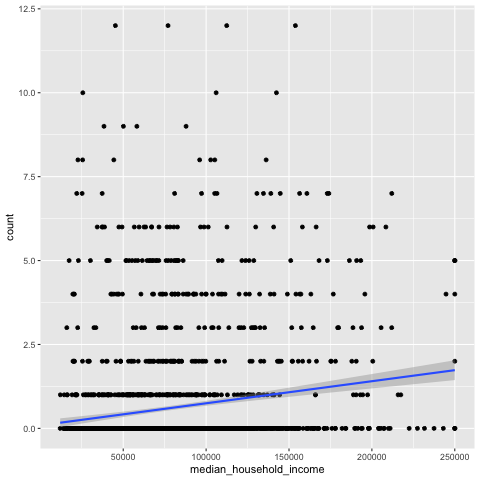

In [28]:
%%R  

# plot the data

# label  the  dots  

# ggplot(df, aes(x = `median_household_income`, y = `count`)) + geom_point() + geom_smooth(method = 'lm') + geom_text(aes(label = `tract`), vjust = -1, hjust = 1, size = 3)

ggplot(df, aes(x = `median_household_income`, y = `count`)) + geom_point() + geom_smooth(method = 'lm')


In [29]:
# save df to csv

df.to_csv('edited_complaints.csv', index = False)